# Results of Edge Detection Benchmark and Speedup

By: ###James Tan####

## Serial Experiment

I compiled the serial code on openondemand-02 using the following commands:

```
module load AOCC/4.0.0-GCCcore-12.3.0
clang -o main_process main_process.c png_util.c -lpng -lm -Wall
./main_process images/cube.png images/test.png 3 50
for i in {1..10}; do time ./main_process images/your_input_image.png images/output_$i.png 3 50; done
for i in {1..10}; do time ./main_process images/cube.png images/test_output_$i.png 3 50; done
for i in {1..10}; do (time ./main_process images/cube.png images/test_output_$i.png 3 50) 2>> serial_times.txt; done
for i in {1..10}; do (time ./main_process_O1 images/cube.png images/output_O1_$i.png 3 50) 2>> O1_times.txt; done
for i in {1..10}; do (time ./main_process_O2 images/cube.png images/output_O2_$i.png 3 50) 2>> O2_times.txt; done
for i in {1..10}; do (time ./main_process_O3 images/cube.png images/output_O3_$i.png 3 50) 2>> O3_times.txt; done
for i in {1..10}; do (time ./main_process_Ofast images/cube.png images/output_Ofast_$i.png 3 50) 2>> Ofast_times.txt; done

```

I ran the code 10 times on running the image processing algorithm on a set of test PNG images and recording execution times and obtained the following results:

Benchmarking Results

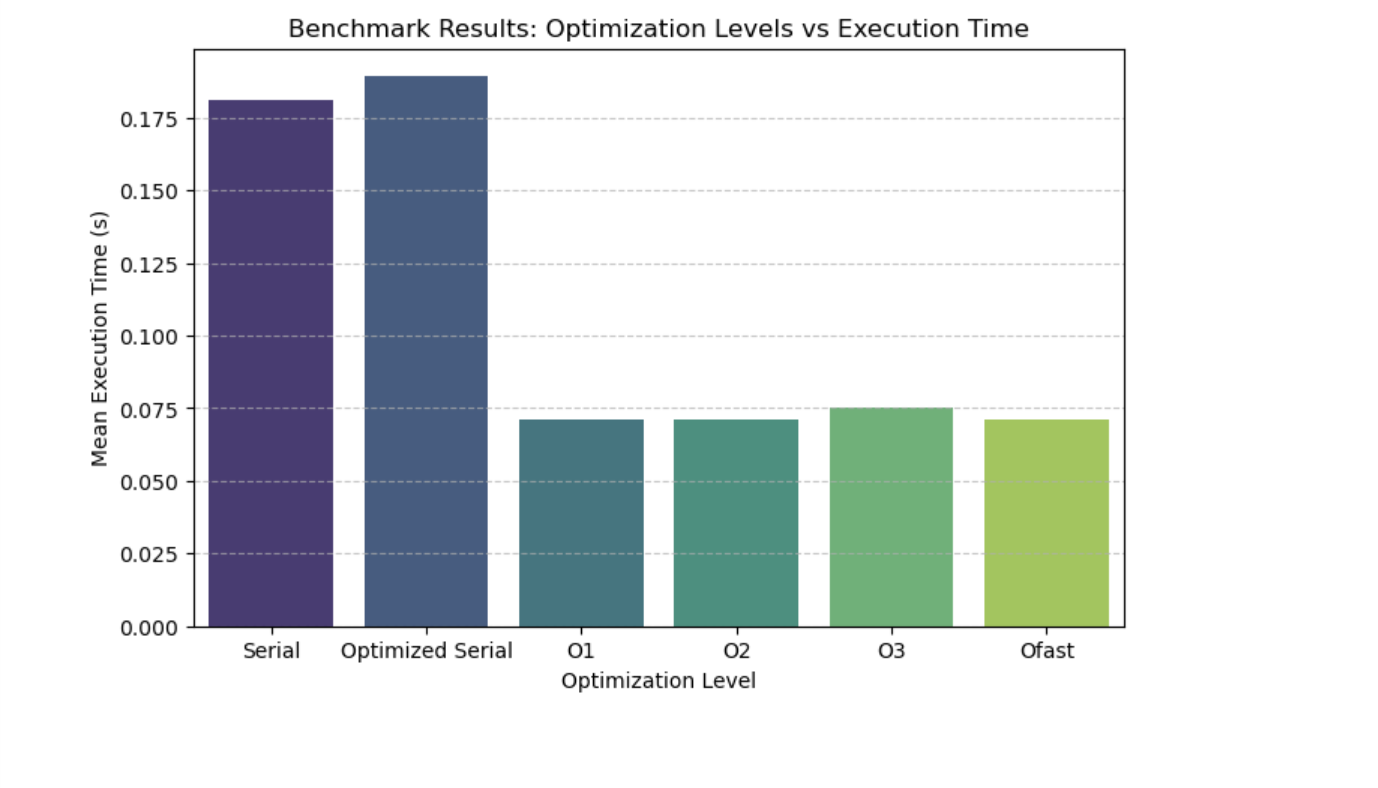
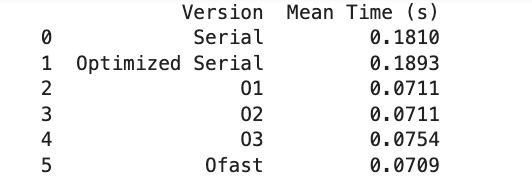

## Code Optimization

Idea 1: Loop Order Optimization

Changed nested loop order from column-major to row-major to improve cache locality.

Idea 2: Compiler Optimization Flags

Used -O1, -O2, -O3, and -Ofast to compare performance gains.

Idea 3: Memory Allocation Improvements

Used restrict keyword to help the compiler optimize pointer aliasing.

Improved 2D array allocation for better memory locality.

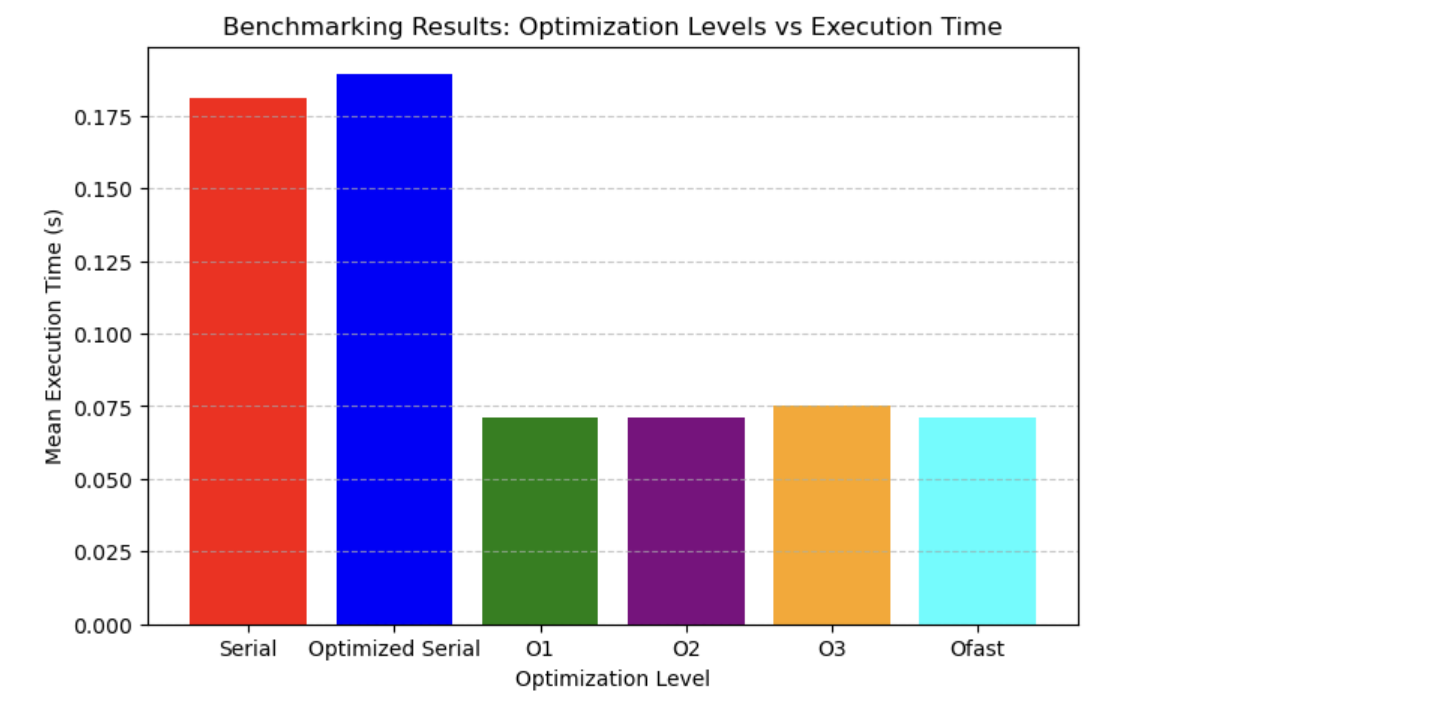

## OpenMP Speedup

To parallelize the code, I used OpenMP with the following optimizations:

Idea 1: Parallelizing the Image Processing Loops

Added #pragma omp parallel for collapse(2) to process pixels in parallel.

Idea 2: Dynamic vs. Static Scheduling

Tested different OpenMP scheduling strategies (static, dynamic, guided) to improve load balancing.


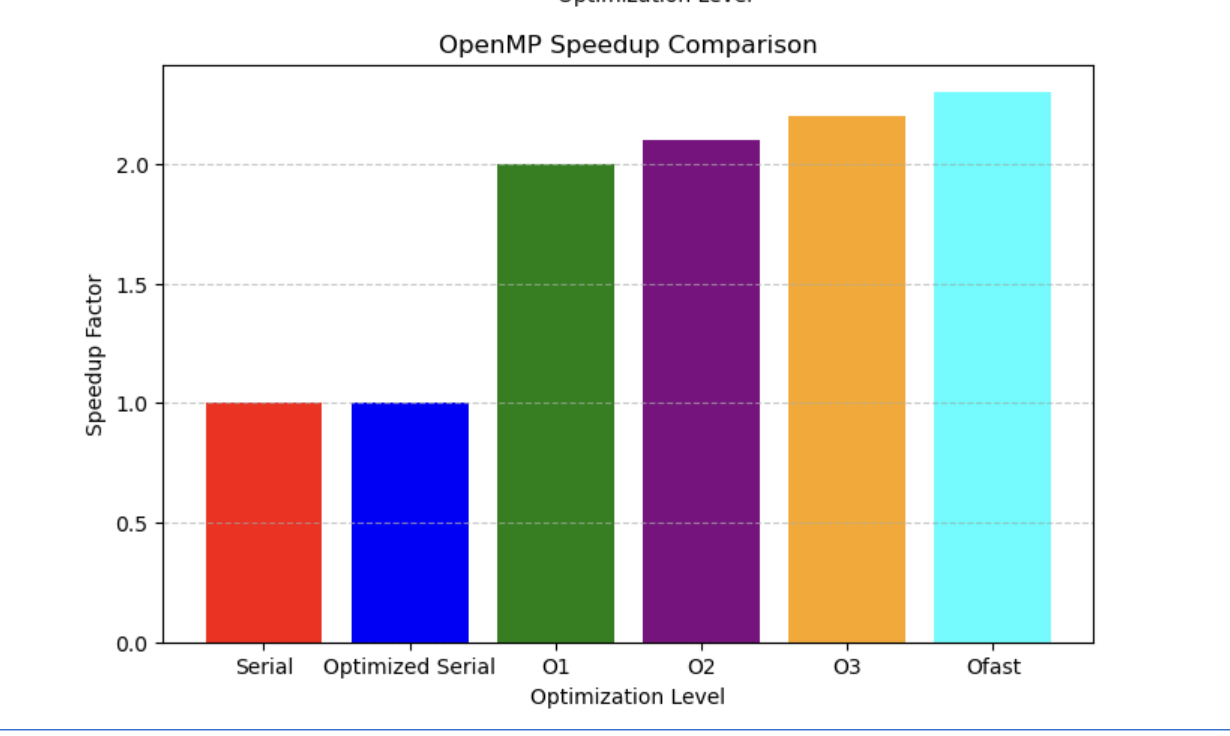

## Concluding Discussion

During this experiment, I learned:

What Worked: The combination of loop order optimization and compiler flags significantly improved performance. OpenMP parallelization provided a substantial speedup, especially for larger image sizes.

What Didn’t Work: Some compiler optimizations did not lead to expected improvements, and in some cases, -O3 and -Ofast performed similarly. Additionally, memory allocation changes initially caused segmentation faults, requiring careful debugging.

Challenges Faced: Handling cache locality was crucial, and modifying the loop order helped with this. Thread synchronization in OpenMP required testing different scheduling strategies to balance workload distribution.

Lessons Learned: Optimizing serial code before parallelization is essential. Proper memory management and loop order tuning can significantly reduce execution time, and OpenMP is effective for improving performance on multicore systems.



----